Importing packages to load data in google colab. And mounting drive by giving it's global path.

In [0]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Assigning the dataset path, and also all the 4 categories to an array.



In [0]:
DATADIR="/content/drive/My Drive/Image_2/Image_2/Input/Dataset/train"
CATEGORIES=["category 1","category 2","category 3","category 4"]

Importing all required packages.

**OS**  this package is used to access the storage files.

**CV2**  this package is used for loading Images, resizing etc.,

**regularizers**  In the code I'm using L2 regularizer to get rid off overfitting.

**Sequential** is used to define a sequential model. we can also able to use **Model** here in the place of Sequential, but building the model may vary.

We have imported all these layes ( **Dense**, **Conv2D**,**MaxPooling2D**,**Dense**,**Dropout**, **Flatten**,**BatchNormalization**,**Activation** ) from Keras.

1) **Dense** is used for defining fully connected layers,\
2) **Conv2D**  is used for defining convolution layers,\
3) **MaxPooling2D** is used to define pooling layers here we have used max pooling,\
4) **Dropout**  is used to add dropout, dropout is used  to get rid of overfitting,\
5) **Flatten** is used to flattening the feature maps,\
6) **BatchNormalization** is used to improve the speed, performance, and stability of the network,\
7) **Activation**  is used to defing activation function.

**to_categorical** is used to create one-hot encoding to label data.

**RMSprop** I have used RMS prop as optimizer.

**train_test_split** is used to total data into portions for training, validation, testing.

**LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint** are callbacks used for setting learning rates, reducing learning rate depend on any quantity like accuracy or loss, and  also for saving the model if it obey's the condition.

**numpy**  is used for numerical operations.

**matplotlib** for ploting images and grapths etc..,


In [0]:
import keras
import os
import cv2
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input,BatchNormalization,Activation,AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.layers import Reshape
from keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Scheduling the learning rate upto 50 epochs 0.001, after that upto 75 epochs 0.0005, after 75 0.0003. This learning rates I'm using because while traing I have used different learning rates but these are giving good results. This function we call in **LearningRateScheduler** in this call back.

In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 50:
        lrate = 0.0005
    if epoch > 75:
        lrate = 0.0003
    return lrate

In [0]:
training_data=[]
training_label=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(512,512))
                training_data.append(new_array)
                training_label.append(class_num)
            except:
                    pass
create_training_data()
print(len(training_data))
print(len(training_label))

440
440


Converting the data into numpy arrays for convenient use.

In [0]:
training_data=np.array(training_data)
training_label=np.array(training_label)

print(training_data.shape)
print(training_label.shape)

(440, 512, 512, 3)
(440,)


Splitting the dataset into two parts. One part is for training and anothe part is for validation.

90% for training that is 396 images, and 10% for validation 44 images.

In [0]:
x_train, x_val, y_train, y_val = train_test_split(training_data, training_label, test_size=0.1, random_state=10)

In [0]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(396, 512, 512, 3)
(44, 512, 512, 3)
(396,)
(44,)


Ploting the traing data histogram using matplotlib to visualize the traing data distribution.

(array([ 94.,   0.,   0.,  96.,   0.,   0., 100.,   0.,   0., 106.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

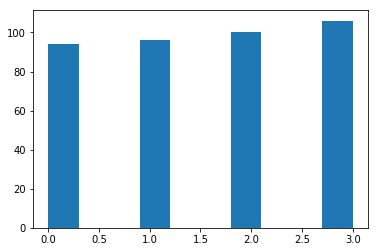

In [0]:
plt.hist(y_train)

Ploting the validation data histogram using matplotlib to visualize the validation data distribution.

(array([ 8.,  0.,  0., 11.,  0.,  0., 12.,  0.,  0., 13.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

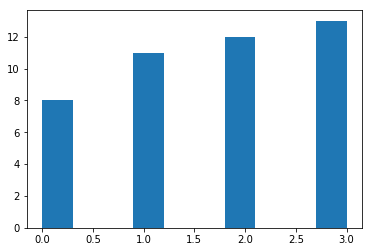

In [0]:
plt.hist(y_val)

Total we have 4 classes, checking that one.

In [0]:
classes = np.unique(y_train)
print('Total number of outputs : ', len(classes))

Total number of outputs :  4


 Normalizing the dataset, because neural network can easily able to predict values between 0,1. And the same time creating one hot encoding for traning and validation labels.

In [0]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255

y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

Confirming for the corresponding image we are getting correct label or not.

(512, 512, 3)


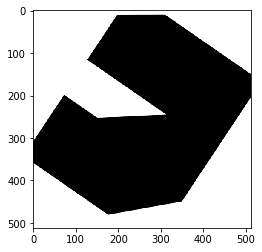

[1. 0. 0. 0.]


In [0]:
i=100
print(x_train[i].shape)

plt.imshow(x_train[i])
plt.show()
print(y_train_one_hot[i])

Building the model starts here.

Our model has 8 convolution layers, and 5 fully connected layers including output layer. I'm using max pooling in my model, and activation as relu, throughout the model i have used 3x3 kernal. I have used varying dropout. And visualizing the summary.

Smaller networks are giving good traing and validation accuracy,  but they are not giving good testing accuracy.

In [0]:
 
weight_decay = 1e-4
model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))
 
model.summary()

W0802 17:56:10.687747 139764987926400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 17:56:10.731403 139764987926400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 17:56:10.737752 139764987926400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 17:56:10.787225 139764987926400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0802 17:56:10.788183 1397649879

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 512, 512, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 512, 512, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 16)      64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 16)      2320      
_________________________________________________________________
activation_2 (Activation)    (None, 512, 512, 16)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512, 512, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 16)      0         
__________

IIn the first step I'm compiling the model, as I said earlier I'm using RMSprop as optimizer with, and loss function as categorical_crossentroply.

And Whenever the validation loss stops decreasing the learning rate decreses.

created check points.

I'm using batch_size 32. triang for 100 epochs.

using model.fit I'm fitting the model for our dataset.

In [0]:
rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

model.compile(loss='categorical_crossentropy',optimizer=rms,metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.0001,mode='min')

callbacks_list = [reduce_lr,LearningRateScheduler(lr_schedule)]

batch_size=32

epochs=100
history=model.fit(x_train,y_train_one_hot,batch_size=batch_size,epochs=epochs,verbose=1,callbacks=callbacks_list,validation_data=(x_val,y_val_one_hot))

W0802 17:56:14.452925 139764987926400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 17:56:14.664067 139764987926400 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 396 samples, validate on 44 samples
Epoch 1/100
396/396 [==============================] - 21s 53ms/step - loss: 6.8411 - acc: 0.3510 - val_loss: 2.2269 - val_acc: 0.5682
Epoch 2/100
396/396 [==============================] - 7s 18ms/step - loss: 2.4793 - acc: 0.6136 - val_loss: 1.9085 - val_acc: 0.8182
Epoch 3/100
396/396 [==============================] - 7s 18ms/step - loss: 1.8210 - acc: 0.7197 - val_loss: 1.6876 - val_acc: 0.7500
Epoch 4/100
396/396 [==============================] - 7s 18ms/step - loss: 1.1868 - acc: 0.7576 - val_loss: 0.8803 - val_acc: 0.9091
Epoch 5/100
396/396 [==============================] - 7s 19ms/step - loss: 1.3758 - acc: 0.7677 - val_loss: 1.9959 - val_acc: 0.7273
Epoch 6/100
396/396 [==============================] - 7s 19ms/step - loss: 1.2354 - acc: 0.7828 - val_loss: 0.7846 - val_acc: 0.8636
Epoch 7/100
396/396 [==============================] - 7s 19ms/step - loss: 1.1236 - acc: 0.7551 - val_loss: 0.9484 - val_acc: 0.9091
Epoch 8/100
396/

Defining the path and saving the weights.

In [0]:
filepath="/content/drive/My Drive/Image_2/best_model.hdf5"
model.save_weights(filepath)

Model training has completed. Now I have strated testing our model.

Defining the path of test images.

In [0]:
path='/content/drive/My Drive/Image_2/Image_2/Input/Dataset/test'

Loading the test images into an array.

In [0]:
x_test=[]
for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(512,512))
                x_test.append(new_array)
            except:
                    pass

Creating numpy array.

In [0]:
x_test=np.array(x_test)
print(x_test.shape)

(30, 512, 512, 3)


While traing we have normalized the data, so in the testing phase also we have to normalize the data.

In [0]:
x_test = x_test.astype('float32')
x_test /= 255

Predicting the labels and storing them into y_pred

In [0]:
y_pred=model.predict(x_test)
len(y_pred)

30

Converting the one hot encoded output to numericals.

In [0]:
y_pred=np.argmax(y_pred, axis=1)

print(y_pred[0])

2


Ploting the images and corresponding predicted labels.

I'm printing predicted lable +1, because classes are from 0 to 3. In the original data they are from category 1 to 4.

Prediclted category is printing on the top of image.

categoty 3


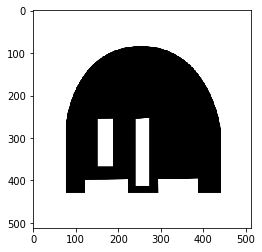

categoty 3


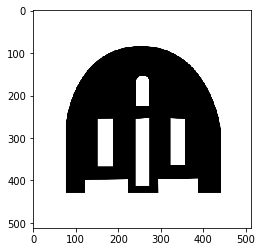

categoty 3


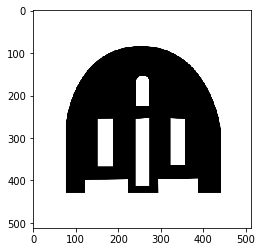

categoty 2


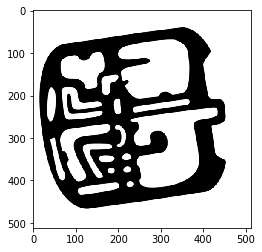

categoty 2


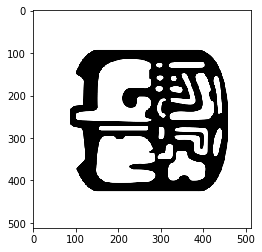

categoty 3


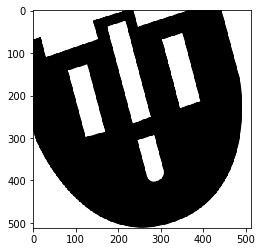

categoty 1


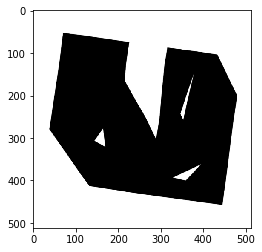

categoty 1


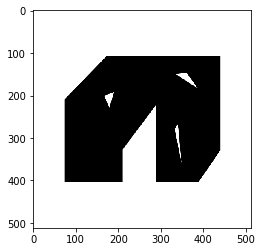

categoty 4


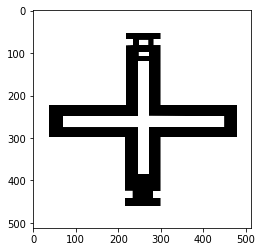

categoty 2


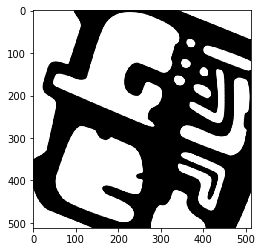

categoty 2


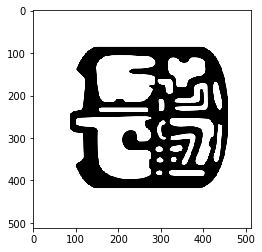

categoty 3


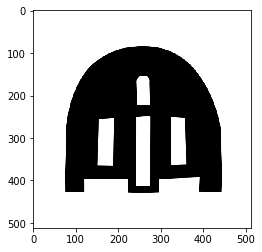

categoty 4


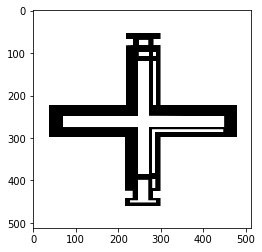

categoty 3


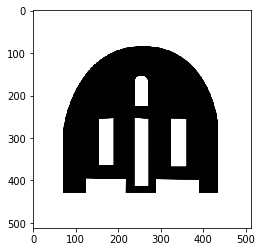

categoty 2


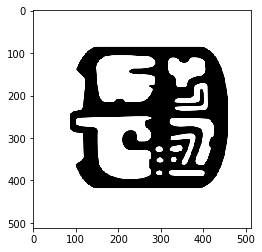

categoty 3


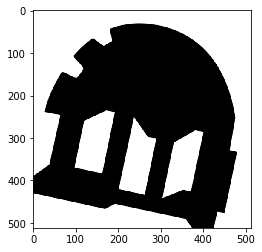

categoty 4


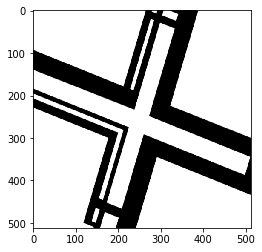

categoty 1


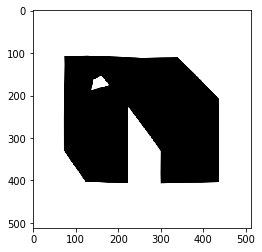

categoty 1


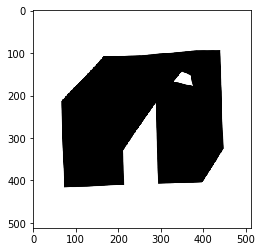

categoty 2


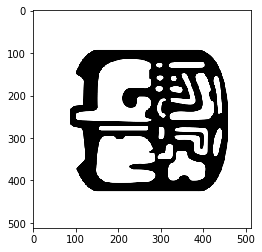

categoty 3


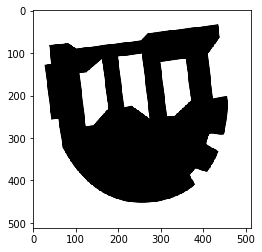

categoty 2


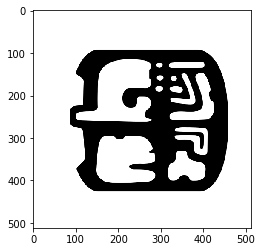

categoty 4


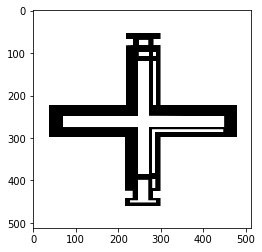

categoty 3


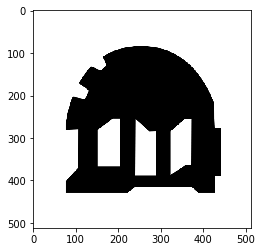

categoty 1


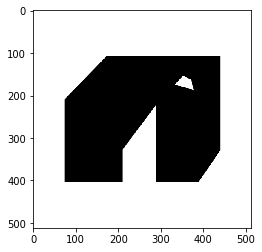

categoty 2


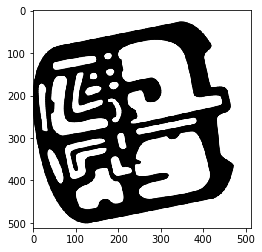

categoty 4


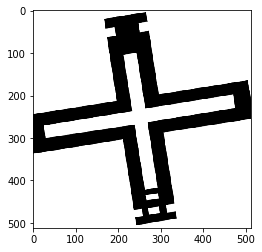

categoty 3


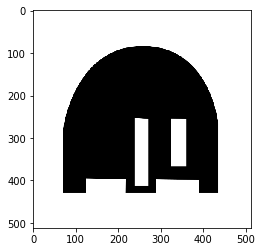

categoty 3


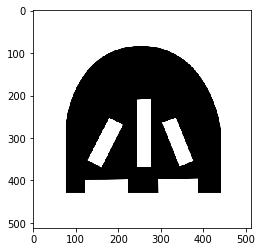

categoty 2


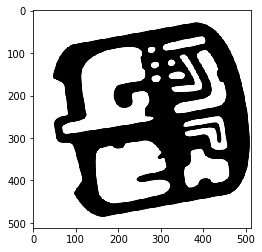

In [0]:
for i in range(len(y_pred)):
  plt.imshow(x_test[i])
  print("categoty",y_pred[i]+1)
  plt.show()

In [1]:
1e-4

0.0001